In [1]:
!nvidia-smi

Mon Feb 28 11:11:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow==2.3.0

     |████████████████████████████████| 320.4 MB 47 kB/s 
     |████████████████████████████████| 2.9 MB 37.8 MB/s 
     |████████████████████████████████| 459 kB 45.7 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
 

In [1]:
!wget https://www.dropbox.com/s/a4ubbe1v8s2dc54/Dataset_3channel.zip?dl=0

--2022-02-28 11:13:49--  https://www.dropbox.com/s/a4ubbe1v8s2dc54/Dataset_3channel.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/a4ubbe1v8s2dc54/Dataset_3channel.zip [following]
--2022-02-28 11:13:50--  https://www.dropbox.com/s/raw/a4ubbe1v8s2dc54/Dataset_3channel.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc26ffd54e8253a2e02baf691617.dl.dropboxusercontent.com/cd/0/inline/Bgm4iT1aCu4ITBRvLFp-vNib-9Vi7NcMIiS1AVOpDDG18YtK-CpruIKgmZgSe9aGbc_s1a8omzhFs0OP59o72KkG4Xfcl4t17s9HOoJP9zX9f2-AqnNFpXTegRN2hJh7I584A4V_Dg0FDLhKUhADnTlK/file# [following]
--2022-02-28 11:13:50--  https://uc26ffd54e8253a2e02baf691617.dl.dropboxusercontent.com/cd/0/inline/Bgm4iT1aCu4ITBRvLFp-vNib-9Vi7NcMIiS1AVOpDDG18YtK-CpruIKgmZgSe

In [2]:
!unzip -q "/content/Dataset_3channel.zip?dl=0"

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
#from livelossplot import PlotLossesKerasTF

In [4]:
tf.__version__

'2.3.0'

In [5]:
img_height = 300
img_width = 300
batch_size = 32

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1) # set validation split

In [7]:
from pathlib import Path
# Creating the Pathlib PATH objects
train_data_dir= Path("/content/Dataset_3_channel/Train")

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data


validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 1354 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [9]:
import tensorflow

In [10]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [11]:
pre_trained_model = InceptionV3(input_shape = (300, 300, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [12]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [13]:
from tensorflow.keras import layers
from tensorflow.keras import Model


# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)

# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x)

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [14]:
from tensorflow.keras.optimizers import RMSprop

In [15]:
# Compiling your model by providing the Optimizer , Loss and Metrics
model.compile(
    optimizer = RMSprop(lr=0.0001),
    loss = 'binary_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [16]:
# Defining our callbacks 
checkpoint = tf.keras.callbacks.ModelCheckpoint("bw2_IncV3.h5",verbose=1,save_best_only=True,save_weights_only = True)
# if false then it will save for every iteration

early_stop = tf.keras.callbacks.EarlyStopping(patience=20)

In [17]:
csv_log = tf.keras.callbacks.CSVLogger(
    'Inc2.csv', separator=',', append=False
)

In [18]:
# Train the model
history = model.fit(
    train_generator,  
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100,
    callbacks=[checkpoint, early_stop, csv_log],
    validation_data=validation_generator,
    validation_steps = validation_generator.samples // batch_size,
)

Epoch 1/100
42/42 [==============================] - ETA: 0s - loss: 3.4253 - accuracy: 0.7534 - precision: 0.7618 - recall: 0.7364
Epoch 00001: val_loss improved from inf to 1.86046, saving model to bw2_IncV3.h5
42/42 [==============================] - 30s 706ms/step - loss: 3.4253 - accuracy: 0.7534 - precision: 0.7618 - recall: 0.7364 - val_loss: 1.8605 - val_accuracy: 0.7578 - val_precision: 0.9487 - val_recall: 0.5606
Epoch 2/100
42/42 [==============================] - ETA: 0s - loss: 0.5764 - accuracy: 0.8903 - precision: 0.8976 - recall: 0.8827
Epoch 00002: val_loss improved from 1.86046 to 1.07884, saving model to bw2_IncV3.h5
42/42 [==============================] - 23s 539ms/step - loss: 0.5764 - accuracy: 0.8903 - precision: 0.8976 - recall: 0.8827 - val_loss: 1.0788 - val_accuracy: 0.7578 - val_precision: 1.0000 - val_recall: 0.5079
Epoch 3/100
42/42 [==============================] - ETA: 0s - loss: 0.3703 - accuracy: 0.9206 - precision: 0.9231 - recall: 0.9160
Epoch 0000

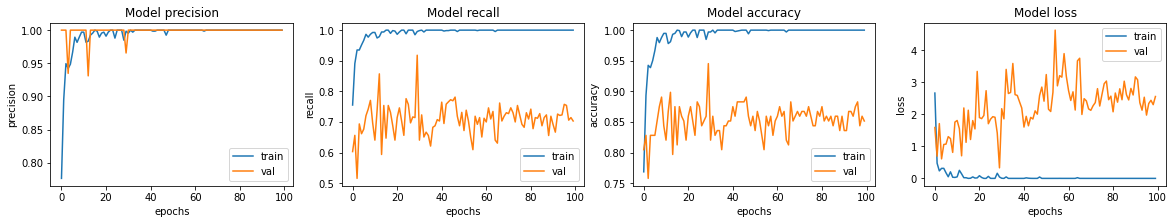

In [ ]:
# Interpreting the Metrics 
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [19]:
# Saving the best Model

# Load the best weights
model.load_weights("bw2_IncV3.h5")
# Save the whole model (weigths + architecture)

In [20]:
model.save("Incv3_2.h5")

In [25]:
# Loading the whole model
loaded_model = tf.keras.models.load_model("Incv3_2.h5")

In [26]:
test_data_dir= Path("/content/Dataset_3_channel/Test")

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0)

In [28]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary',
    subset='training')

Found 320 images belonging to 2 classes.


In [29]:
# Evaluating the loaded model
loss, acc, prec, rec = loaded_model.evaluate(test_generator)  # training = 92.06 %

print(" Testing Acc : " , acc)
print(" Testing Precision " , prec)
print(" Testing Recall " , rec)

10/10 [==============================] - 3s 268ms/step - loss: 0.7508 - accuracy: 0.7969 - precision: 0.7295 - recall: 0.9438
 Testing Acc :  0.796875
 Testing Precision  0.729468584060669
 Testing Recall  0.9437500238418579
